In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [91]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300),fontFace= font, fontScale= 5, color= (255,255,255), thickness =25)
    return blank_img

In [92]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

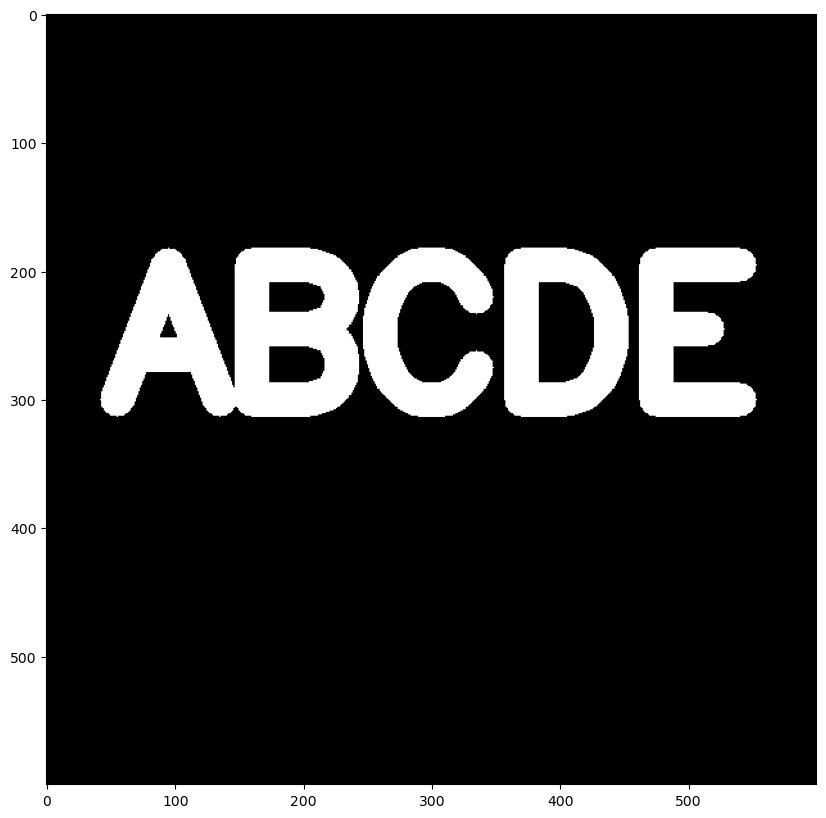

In [93]:
img = load_img()
display_img(img)

In [94]:
''' ERROSION: ERODE THE BOUNDARY'''

' ERROSION: ERODE THE BOUNDARY'

In [95]:
kernel = np.ones((5,5),dtype= np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

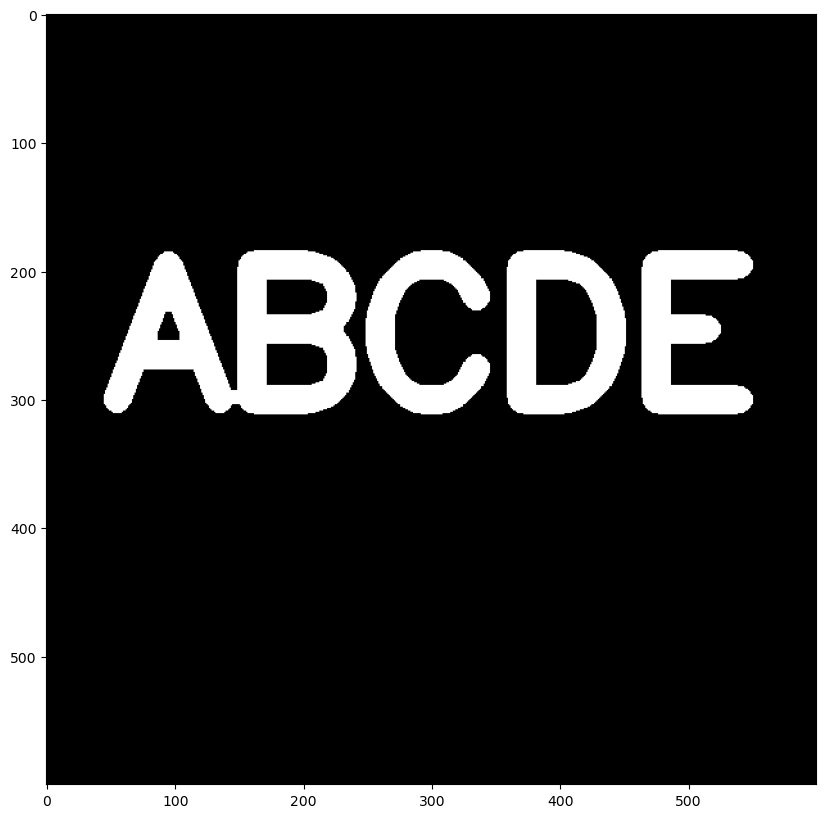

In [96]:
eroded_img=cv2.erode(img,kernel,iterations=1)
display_img(eroded_img)

In [97]:
''' OPENING: EROSION FOLLOWED BY DILATION'''
#removes noise

' OPENING: EROSION FOLLOWED BY DILATION'

In [98]:
img = load_img()

In [99]:
white_noise = np.random.randint(low=0,high=2, size =(600,600))
white_noise

array([[1, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 0, 1]])

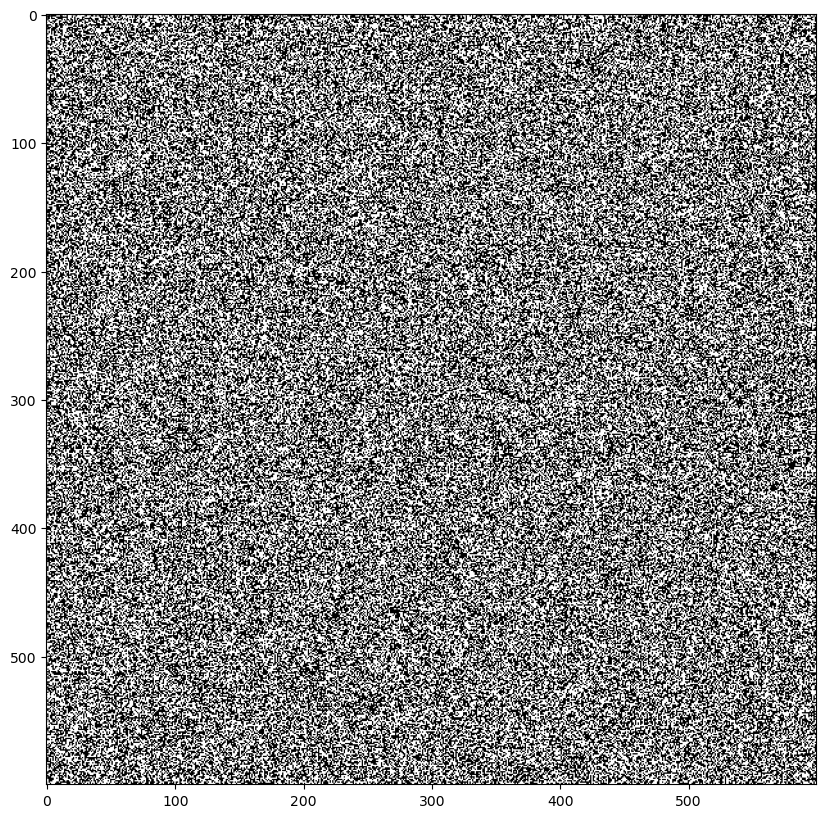

In [100]:
display_img(white_noise)

In [101]:
img.max()

255.0

In [102]:
# image max is 255, but white noise max is 1
# so we need to convert white noise to 255

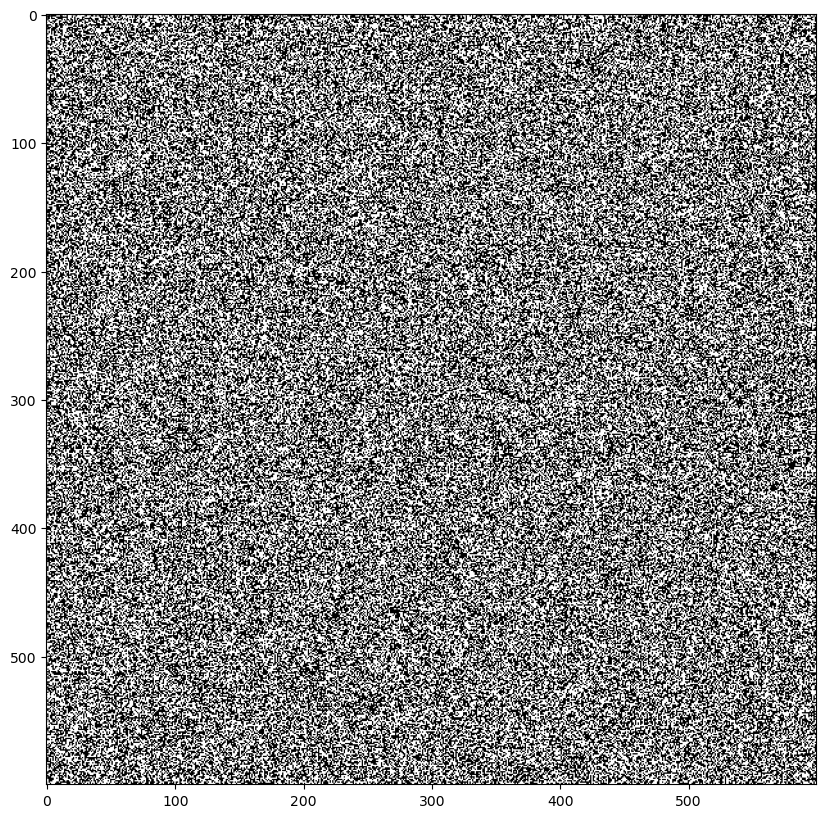

In [103]:
white_noise = white_noise*255
display_img(white_noise)

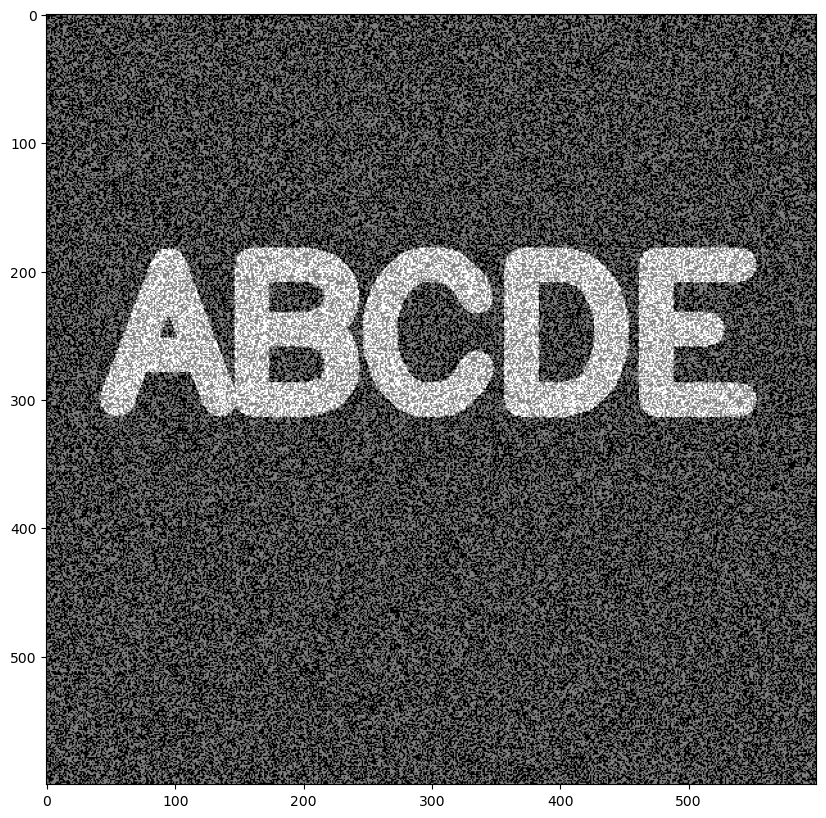

In [104]:
noise_img = white_noise + img 
display_img(noise_img)

In [105]:
# Using opening to remove the background noise
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)

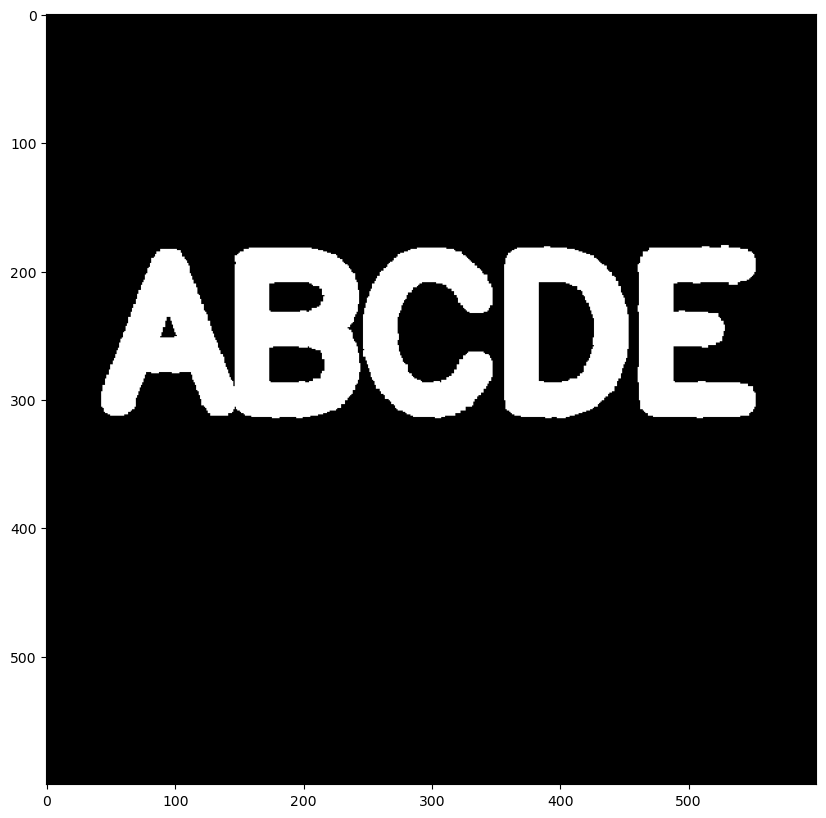

In [106]:
display_img(opening)

In [107]:
''' Introducing foreground noise, 
Using CLOSING to remove the foreground noise'''
img = load_img()

In [108]:
black_noise = np.random.randint(low=0, high =2, size=(600,600))

In [109]:
black_noise = black_noise*-255
black_noise

array([[-255, -255, -255, ...,    0, -255,    0],
       [-255,    0,    0, ...,    0, -255,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., -255,    0,    0],
       [-255,    0,    0, ...,    0, -255,    0],
       [   0,    0,    0, ...,    0,    0, -255]])

In [110]:
black_noise_img = img + black_noise
black_noise_img
# all black part of image will go to -255
# while white part of image will got to 0 at some random places

array([[-255., -255., -255., ...,    0., -255.,    0.],
       [-255.,    0.,    0., ...,    0., -255.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ..., -255.,    0.,    0.],
       [-255.,    0.,    0., ...,    0., -255.,    0.],
       [   0.,    0.,    0., ...,    0.,    0., -255.]])

In [111]:
#whereever we have -255 we brigng it back to 0
black_noise_img[black_noise_img==-255]=0
black_noise_img.min()

0.0

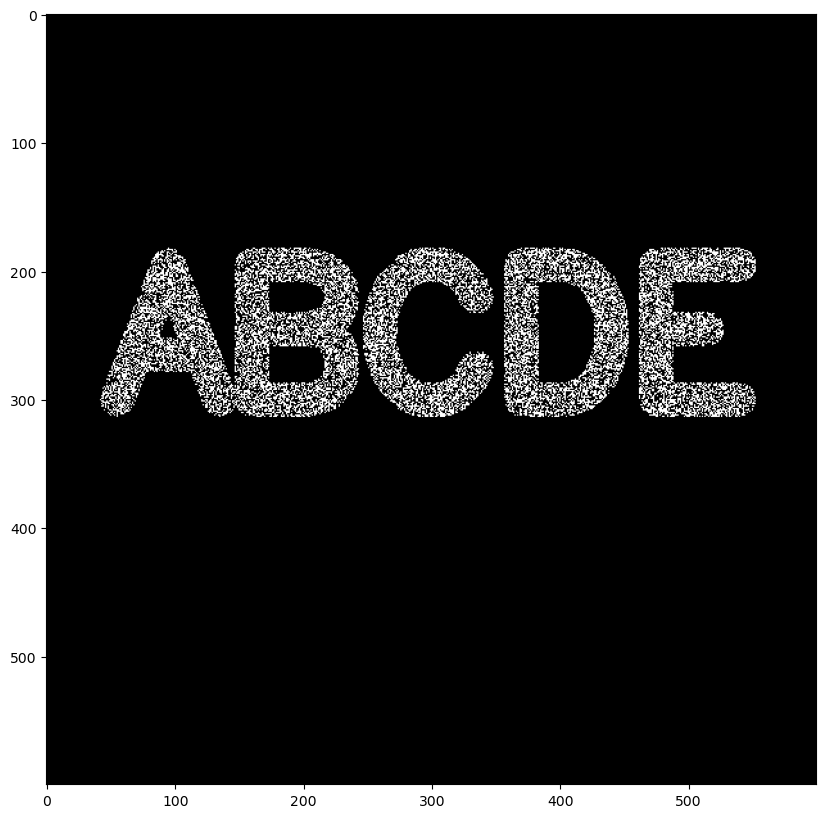

In [112]:
display_img(black_noise_img)

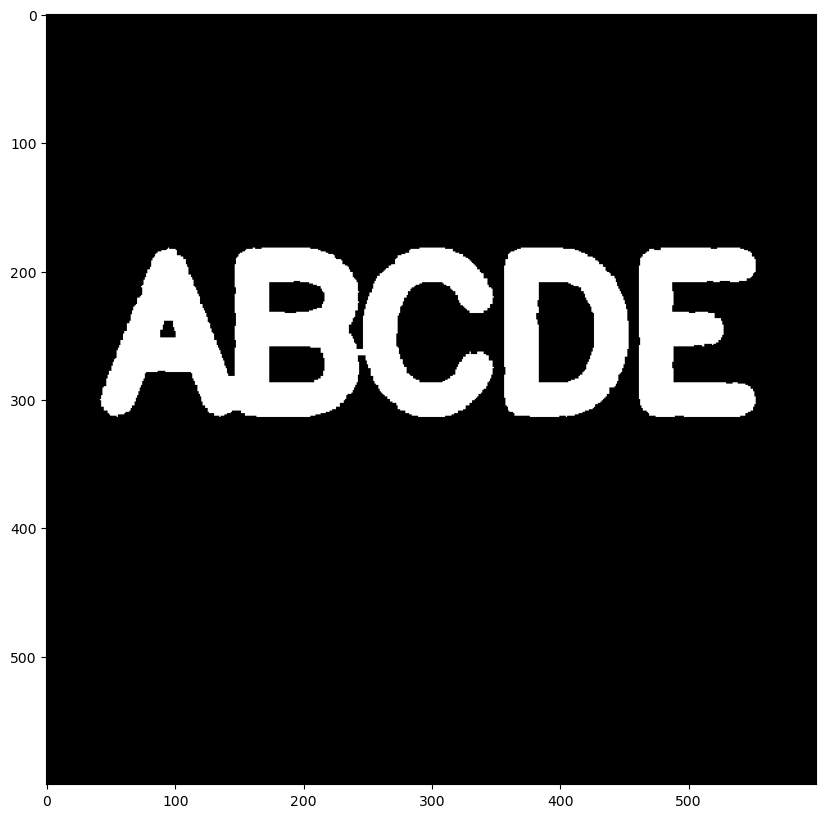

In [113]:
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE, kernel)
display_img(closing)

In [114]:
'''MORPHOLOGICAL GRADIANT'''
# takes difference of erosion and dilation of image
# Erosion tries removes the foreground, dilation performs the opposite
# Gradiant takes difference 

'MORPHOLOGICAL GRADIANT'

In [115]:
img = load_img()

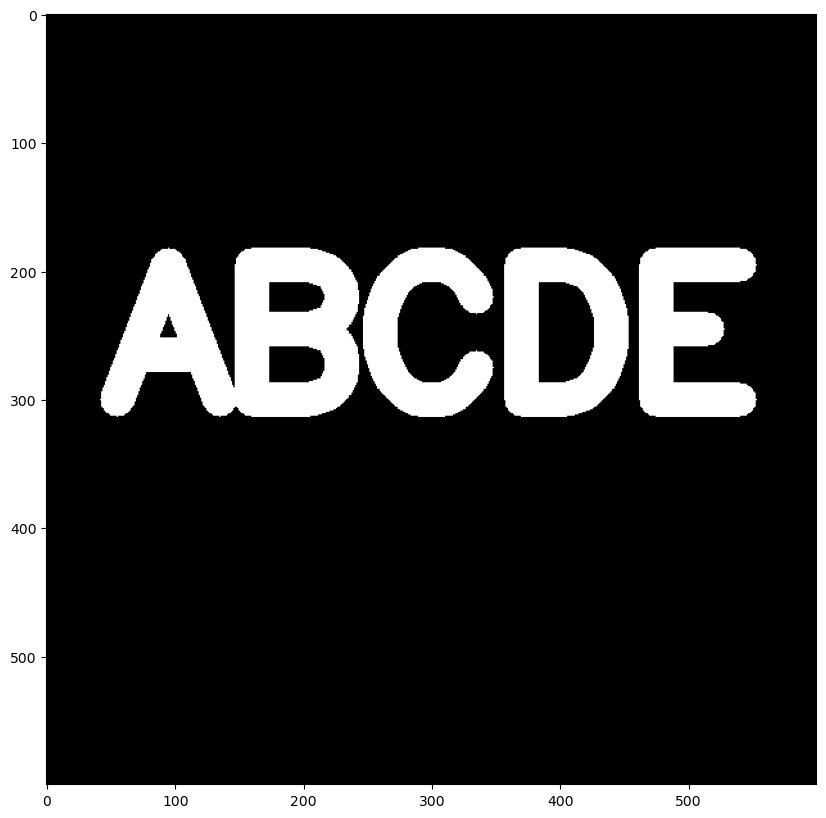

In [116]:
display_img(img)

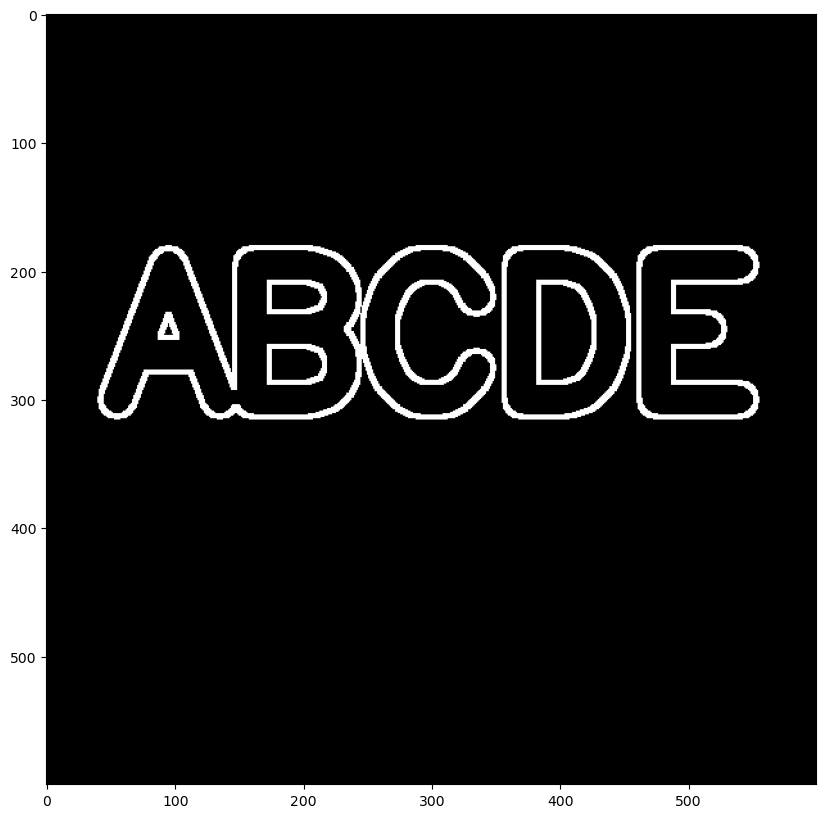

In [117]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)